In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Import and manage data

In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 
 

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

In [3]:
# data 
print(optical_recognition_of_handwritten_digits.data)

{'ids': None, 'features':       Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0              0           1           6          15          12           1   
1              0           0          10          16           6           0   
2              0           0           8          15          16          13   
3              0           0           0           3          11          16   
4              0           0           5          14           4           0   
...          ...         ...         ...         ...         ...         ...   
5615           0           0           4          10          13           6   
5616           0           0           6          16          13          11   
5617           0           0           1          11          15           1   
5618           0           0           2          10           7           0   
5619           0           0          10          14           8           1   

      Attribu

In [4]:
data = optical_recognition_of_handwritten_digits.data


In [5]:
digits = datasets.load_digits()

In [6]:
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [7]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


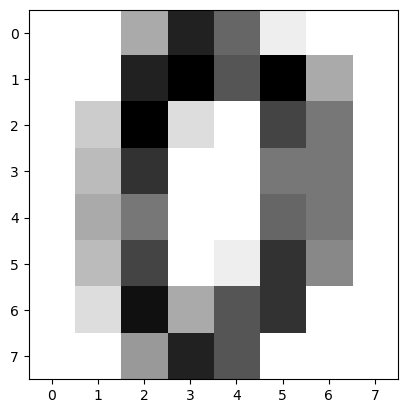

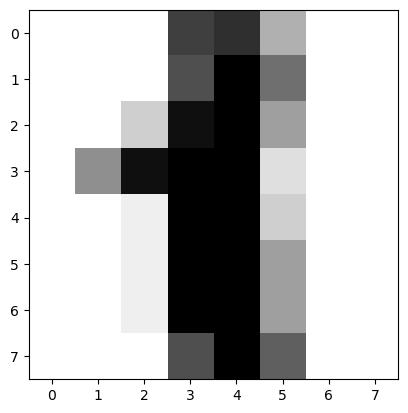

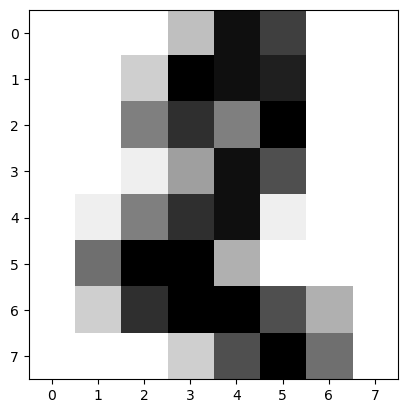

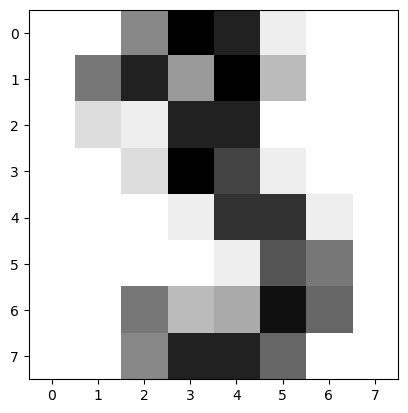

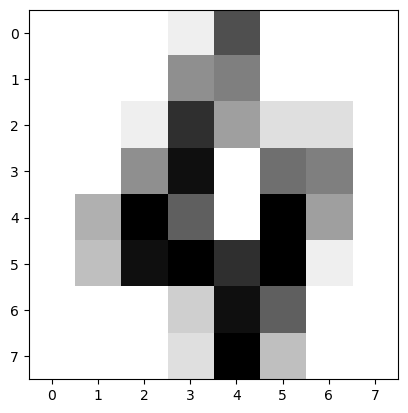

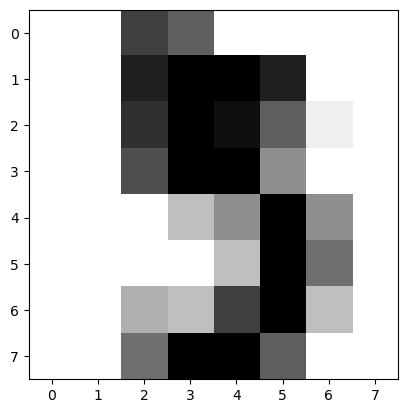

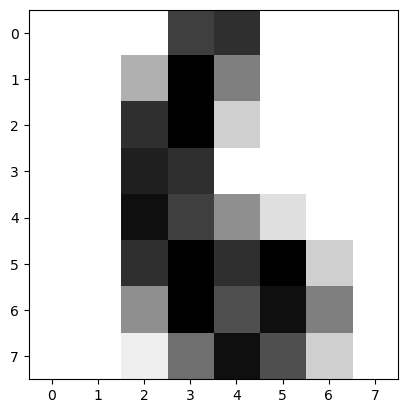

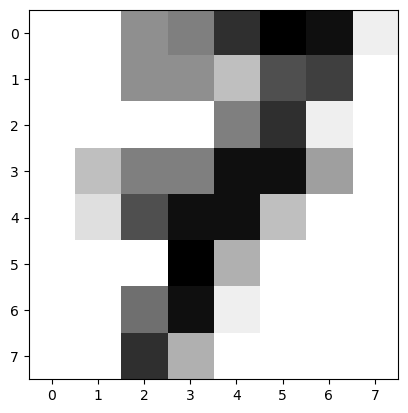

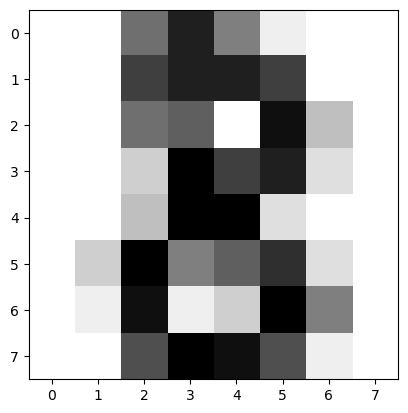

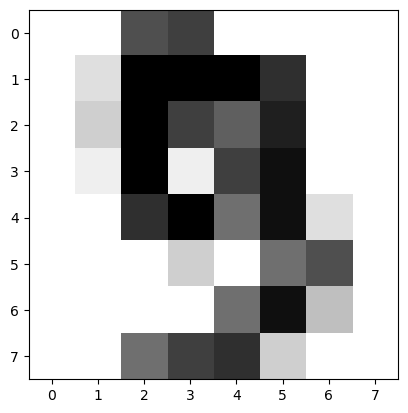

In [8]:
for i in range(10):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [9]:
 # Create feature and target arrays
X = digits.data
y = digits.target

In [10]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)
# stratify=y argument ensures that the split maintains the same distribution of classes in both the training and testing sets as in the original dataset


# Learn SPN

In [1]:
import numpy as np
from spn.structure.Base import Sum, Product
from spn.structure.leaves.parametric.Parametric import Gaussian

def generate_synthetic_data(num_samples=100, num_features=2):
    np.random.seed(42)
    means = np.array([[1, 1], [4, 4]])
    covariances = np.array([[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]])

    labels = np.random.choice([0, 1], size=num_samples)
    data = np.zeros((num_samples, num_features))

    for i in range(num_samples):
        label = labels[i]
        data[i, :] = np.random.multivariate_normal(means[label], covariances[label])

    return data, labels

data = generate_synthetic_data()

def learn_spn(data):
    #from spflow import SPN
    from spn.algorithms.LearningWrappers import learn_parametric

    # Generate synthetic data
    # You should replace this with your own dataset
    data, _ = generate_synthetic_data()

    # Learn SPN
    spn = learn_parametric(data, ds_context_parametric={"min_instances_slice": 20})

    return spn

def main():
    # Learn SPN
    learned_spn = learn_spn(data)

    # Print the learned SPN structure
    print("Learned SPN Structure:")
    print(learned_spn)
'''
if __name__ == "__main__":
    main()
'''

'\nif __name__ == "__main__":\n    main()\n'

In [3]:
import numpy as np

np.random.seed(123)

from spn.algorithms.LearningWrappers import learn_parametric, learn_classifier
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian
from spn.structure.Base import Context
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

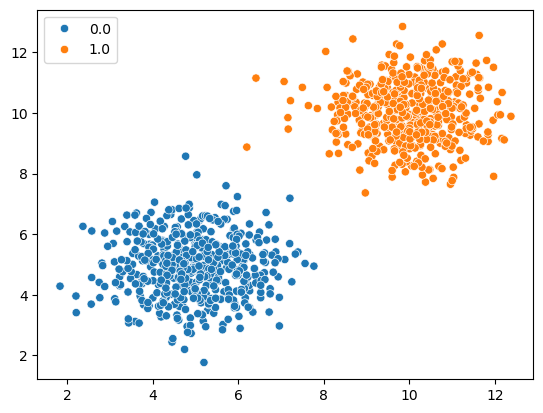

In [4]:
train_data = np.c_[
    np.r_[np.random.normal(5, 1, (500, 2)), np.random.normal(10, 1, (500, 2))],
    np.r_[np.zeros((500, 1)), np.ones((500, 1))],
]

sns.scatterplot(x=train_data[:, 0], y=train_data[:, 1], hue=train_data[:, 2])

In [5]:
dom = np.asarray([[i for i in range(17)]]*65)

In [6]:
spn_classification = learn_classifier(
    train_data, Context(domains = dom, parametric_types=[Gaussian, Gaussian, Categorical]), learn_parametric, 2
)

from spn.io.Graphics import draw_spn

In [7]:
print(spn_classification.children[0].children)

[CategoricalNode_3, GaussianNode_4, GaussianNode_5]


In [8]:

test_data0 = np.array([3.0, 4.0, np.nan, 12.0, 18.0, np.nan]).reshape(-1, 3)

In [9]:
from spn.algorithms.MPE import mpe

print(mpe(spn_classification, test_data0))

[[ 3.  4.  0.]
 [12. 18.  1.]]


c:\Users\loumo\anaconda3\envs\madi_env\Lib\site-packages\spn\structure\leaves\parametric\Inference.py:88: RuntimeWarning: divide by zero encountered in log
  probs[idx_in] = np.array(np.log(node.p))[cat_data[~out_domain_ids]]


In [10]:
first_gauss, snd_gauss = np.ones((500,3))*np.nan, np.ones((500,3))*np.nan
first_gauss[:,:2] = np.random.normal(5, 1, (500, 2))
print(first_gauss)

[[3.22577645 3.79862269        nan]
 [6.09625679 5.86103685        nan]
 [3.47963288 4.55255984        nan]
 ...
 [3.9665623  4.92466514        nan]
 [4.05380093 7.04043199        nan]
 [6.01591697 3.36621183        nan]]


In [11]:
first_gauss, snd_gauss = np.ones((500,3))*np.nan, np.ones((500,3))*np.nan
first_gauss[:,:2] = np.random.normal(5, 1, (500, 2))
snd_gauss[:,:2] = np.random.normal(10, 1, (500, 2))
test_data1 = np.r_[first_gauss, snd_gauss]
test_data_class1 = np.c_[
    np.r_[first_gauss[:,:2], snd_gauss[:,:2]],
    np.r_[np.zeros((500, 1)), np.ones((500, 1))],
]

In [12]:
print(np.shape(test_data_class1))

(1000, 3)


In [13]:
from spn.algorithms.MPE import mpe

pred = mpe(spn_classification, test_data1)
print(np.shape(pred))

(1000, 3)


In [14]:
arr_err = np.where(pred==test_data_class1, 0, 1)
nb_err = np.sum(arr_err)
print(nb_err)

0


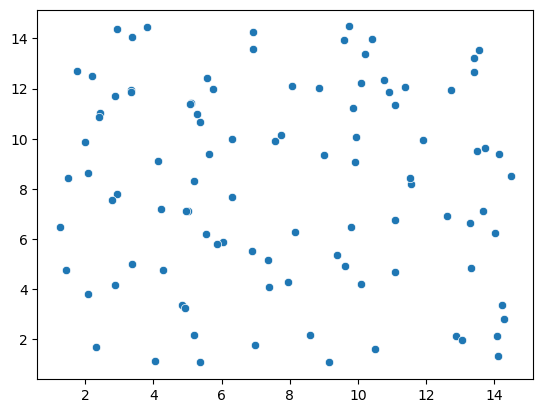

In [15]:
test_data = np.ones((100,3))*np.nan
data = np.random.uniform(15, size=(100,2))
sns.scatterplot(x=data[:, 0], y=data[:, 1])
test_data[:,:2] = data

In [16]:
pred2 = mpe(spn_classification, test_data)
print(np.shape(pred2))

(100, 3)


c:\Users\loumo\anaconda3\envs\madi_env\Lib\site-packages\spn\structure\leaves\parametric\Inference.py:88: RuntimeWarning: divide by zero encountered in log
  probs[idx_in] = np.array(np.log(node.p))[cat_data[~out_domain_ids]]


<Axes: >

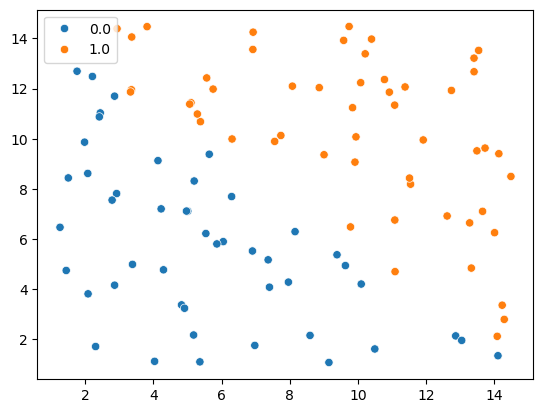

In [17]:
sns.scatterplot(x=pred2[:, 0], y=pred2[:, 1], hue=pred2[:, 2])

learn_classifier(data, ds_context, spn_learn_wrapper, label_idx, **kwargs)

In [18]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'C:/Users/loumo/OneDrive/Documents/Academique/ANDROIDE/M2/MADI/optical+recognition+of+handwritten+digits/optdigits.tra'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now 'df' contains your data, and you can perform various operations on it
print(df.head())  # Display the first few rows of the DataFrame


   0  1   6  15  12  1.1  0.1  0.2  0.3  7  ...  0.21  0.22  0.23  6.3  14.1  \
0  0  0  10  16   6    0    0    0    0  7  ...     0     0     0   10    16   
1  0  0   8  15  16   13    0    0    0  1  ...     0     0     0    9    14   
2  0  0   0   3  11   16    0    0    0  0  ...     0     0     0    0     1   
3  0  0   5  14   4    0    0    0    0  0  ...     0     0     0    4    12   
4  0  0  11  16  10    1    0    0    0  4  ...     3     0     0   10    16   

   7.4  1.3  0.24  0.25  0.26  
0   15    3     0     0     0  
1    0    0     0     0     7  
2   15    2     0     0     4  
3   14    7     0     0     6  
4   16   16    16     6     2  

[5 rows x 65 columns]


In [19]:
print(type(df.values))
print(np.shape(df.values))


<class 'numpy.ndarray'>
(3822, 65)


In [20]:
domain = [[2,3],[1,2]]
domains = np.asanyarray(domain)

In [26]:
dom = np.asanyarray([[i for i in range(17)]]*65)

In [27]:
train_data = df.values
spn_classification = learn_classifier(
    train_data, 
    Context(domains=dom, parametric_types=[Categorical]*65), 
    learn_parametric, 64
)

c:\Users\loumo\anaconda3\envs\madi_env\Lib\site-packages\sklearn\cross_decomposition\_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
c:\Users\loumo\anaconda3\envs\madi_env\Lib\site-packages\sklearn\cross_decomposition\_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
c:\Users\loumo\anaconda3\envs\madi_env\Lib\site-packages\sklearn\cross_decomposition\_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
c:\Users\loumo\anaconda3\envs\madi_env\Lib\site-packages\sklearn\cross_decomposition\_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
c:\Users\loumo\anaconda3\envs\madi_env\Lib\site-packages\sklearn\cross_decom

In [29]:
file_path = 'C:/Users/loumo/OneDrive/Documents/Academique/ANDROIDE/M2/MADI/optical+recognition+of+handwritten+digits/optdigits.tes'

# Read the CSV file into a Pandas DataFrame
df_test = pd.read_csv(file_path)

In [32]:
test_data = df_test.values
#print(test_data)
print(np.shape(test_data))
test_data_no_class = np.ones((1796,65))*np.nan
test_data_no_class[:,:64] = test_data[:,:64]
print(test_data_no_class)


(1796, 65)
[[ 0.  0.  0. ...  0.  0. nan]
 [ 0.  0.  0. ...  9.  0. nan]
 [ 0.  0.  7. ...  0.  0. nan]
 ...
 [ 0.  0.  1. ...  0.  0. nan]
 [ 0.  0.  2. ...  0.  0. nan]
 [ 0.  0. 10. ...  1.  0. nan]]


In [33]:
pred_im = mpe(spn_classification, test_data_no_class)

c:\Users\loumo\anaconda3\envs\madi_env\Lib\site-packages\spn\structure\leaves\parametric\Inference.py:88: RuntimeWarning: divide by zero encountered in log
  probs[idx_in] = np.array(np.log(node.p))[cat_data[~out_domain_ids]]


In [34]:
print(np.shape(pred_im))

(1796, 65)


In [38]:
nb_im = 1796
nb_err = np.where(pred_im==test_data,0,1).sum()
acc = (nb_im-nb_err)/nb_im
print(acc)

0.6648106904231625


In [45]:
im0 = test_data[0][:64]
im0 = im0.reshape((8,8))
print(im0)

[[ 0  0  0 12 13  5  0  0]
 [ 0  0  0 11 16  9  0  0]
 [ 0  0  3 15 16  6  0  0]
 [ 0  7 15 16 16  2  0  0]
 [ 0  0  1 16 16  3  0  0]
 [ 0  0  1 16 16  6  0  0]
 [ 0  0  1 16 16  6  0  0]
 [ 0  0  0 11 16 10  0  0]]


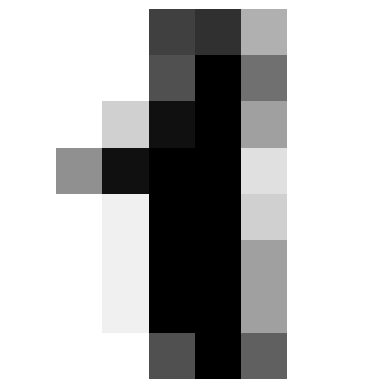

In [48]:
import matplotlib.pyplot as plt
im0 = 16-im0

# Afficher l'image en niveaux de gris
plt.imshow(im0, cmap='gray')
plt.axis('off')  # Désactiver les axes
plt.show()

In [61]:
arr_im0 = np.array([test_data_no_class[0]])
print(arr_im0)
pred_im0 = mpe(spn_classification, arr_im0)

[[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0. nan]]


c:\Users\loumo\anaconda3\envs\madi_env\Lib\site-packages\spn\structure\leaves\parametric\Inference.py:88: RuntimeWarning: divide by zero encountered in log
  probs[idx_in] = np.array(np.log(node.p))[cat_data[~out_domain_ids]]


In [63]:
print(pred_im0[0,64])

1.0


In [66]:
arr_im0to9 = test_data_no_class[:10]
pred_im0to9 = mpe(spn_classification, arr_im0to9)

In [69]:
print(pred_im0to9[:,64])

[1. 0. 3. 4. 0. 6. 7. 8. 0. 0.]


label: 1
pred 1.0


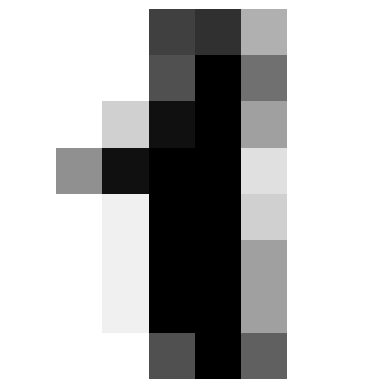

label: 2
pred 0.0


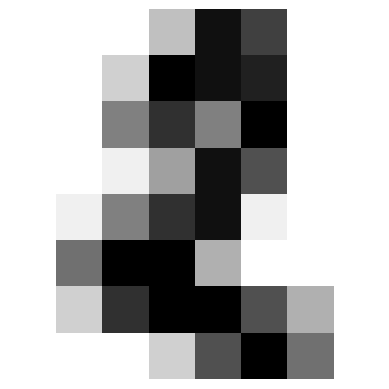

label: 3
pred 3.0


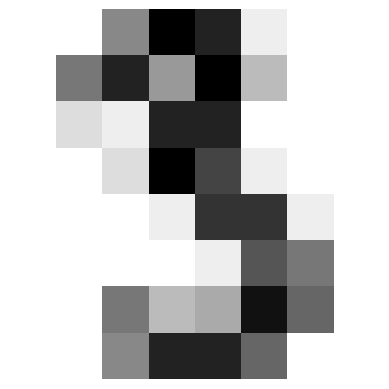

label: 4
pred 4.0


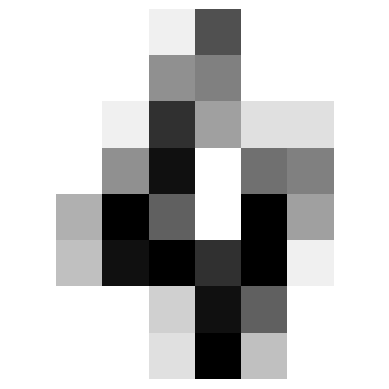

label: 5
pred 0.0


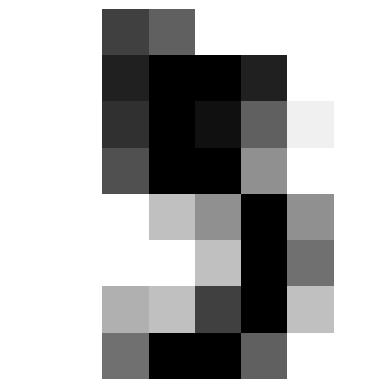

label: 6
pred 6.0


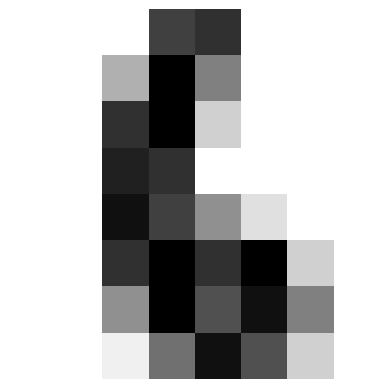

label: 7
pred 7.0


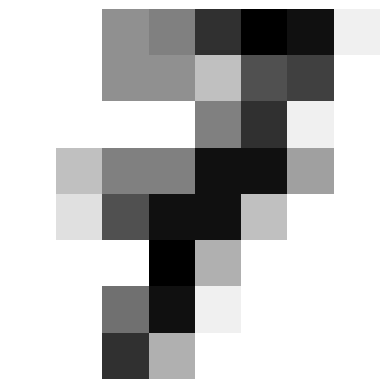

label: 8
pred 8.0


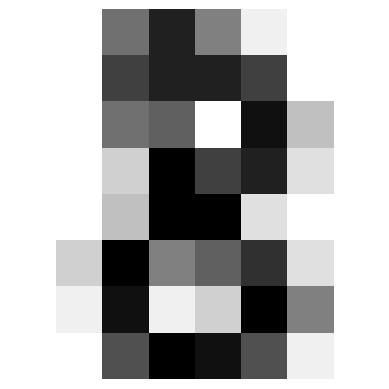

label: 9
pred 0.0


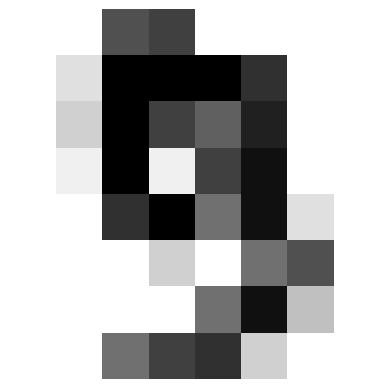

label: 0
pred 0.0


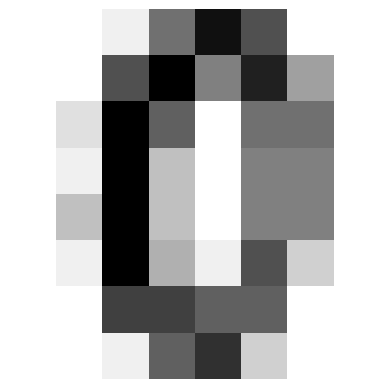

In [81]:
im0to9 = test_data[:10][:64]
for i in range(10):
    print("label:", im0to9[i][64])
    print("pred", pred_im0to9[i,64]) 
    im = im0to9[i][:64]
    im = im.reshape((8,8))
    im = 16-im

    # Afficher l'image en niveaux de gris
    plt.imshow(im, cmap='gray')
    plt.axis('off')  # Désactiver les axes
    plt.show()
    
